In [11]:
# Created on Sun Aug 13 13:14:06 2023

# @author: katelynsmith

import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
#plt.style.use(['no-latex']) 
#from emcee import MASER

import astropy.units as u
from astropy.timeseries import BoxLeastSquares

import maser as ms
import starspot as ss
import astrobase as ab
#from astrobase import periodbase

from tqdm import tqdm 
# Setting directory

ddir = '/Users/katelynsmith/Desktop/Capstone/'

import warnings
warnings.filterwarnings("ignore")

import latex


In [3]:

# Defining variables 

M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS
a = 10 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_p = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lam = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_p = 8.4630351 # AU Mic b period in days
phi_p0 = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
f = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####
alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023

In [14]:
times = np.linspace(0, 40, 100) # Array of observation times to compute (days)

# Call the function
vis_N, vis_S = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)


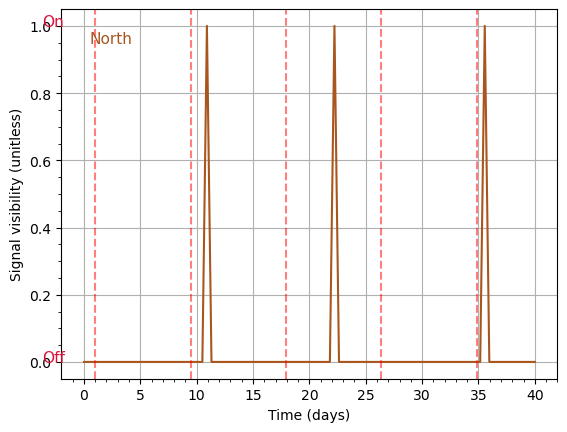

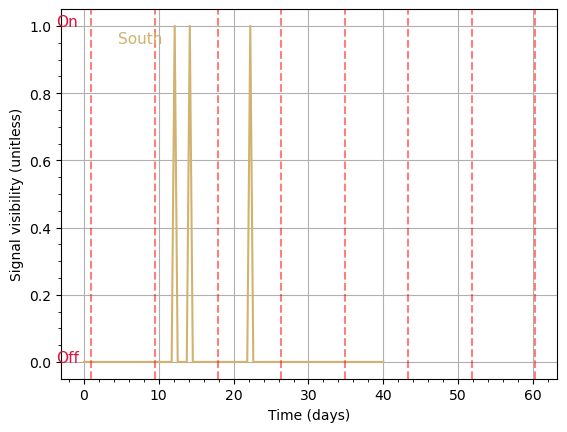

In [15]:
# Plotting results
plt.plot(times, vis_N, color = '#A9561E')
#plt.plot(times % P_s, vis_N, color = '#A9561E')  # attempting to fold light curve
# plt.plot(times % P_s, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=11, color = '#A9561E')
for j in range(5):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )


plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()



plt.plot(times, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=11, color = '#D1B26F')
for j in range(8):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )

plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()

In [ ]:
# determining periods rigorously
# auto correlation function
# fold dispersion
# box least squares periodogram **** astropy bls
# ^^^ 1 - signal
# one hemisphere at a time - one is pos stokes V and other is neg

In [7]:

model_N = BoxLeastSquares(times * u.day, 1-vis_N, dy=0.01)

model_S = BoxLeastSquares(times * u.day, 1-vis_S, dy=0.01)


In [ ]:
# durations = np.linspace(0.1,2,100)*u.d

# best_period_N = []
# best_period_S = []

# for dur in durations:
#     periodogram_N = model_N.autopower(dur)
#     periodogram_S = model_S.autopower(dur)
#     mpN = np.argmax(periodogram_N)
#     bpN = periodogram_N.period[mpN]
#     best_period_N.append(bpN.value)
    
#     mpS = np.argmax(periodogram_S)
#     bpS = periodogram_S.period[mpS]
#     best_period_S.append(bpS.value)

#     plt.plot(periodogram_N.period.value, periodogram_N.power)
#     for j in range(5):
#         plt.axvline(bpN.value*(j+1), linestyle='--',color='k')
#     plt.xlabel("Period (days)")
#     plt.ylabel("Power (W)")

#     plt.show()


# print("The best period (in days) for the northern hemisphere is")
# print(best_period_N)

# print("The best period (in days) for the southern hemisphere is")
# print(best_period_S)


In [ ]:
#times = np.linspace(0, 40, 1000)
#errs = np.array(np.ones(100000)/10)

#flux = []
#for i in vis_N:
#    if i == False:
#        f = 0
#        flux.append(f)
#    else:
#        f = 1
#        flux.append(f)


#vis_T = vis_N + vis_S

#rotate = ss.RotationModel(times, flux, errs)

#lomb_scargle_period = rotate.ls_rotation()
#acf_period = rotate.acf_rotation(interval=np.diff(times)[0])

#print(lomb_scargle_period, acf_period)

#period_grid = np.linspace(5, 20, 1000)
#pdm_period = rotate.pdm_rotation(period_grid, pdm_nbins=10)

#print(lomb_scargle_period, acf_period, pdm_period)

In [8]:
def period(duration, M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times):
   north_visibility, south_visibility = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)
   # check if the whole timeseries is 0

   north_BLS = BoxLeastSquares(times, 1 - north_visibility, dy=None)
   south_BLS = BoxLeastSquares(times, 1 - south_visibility, dy=None)
   #north_BLS = BoxLeastSquares(times * u.day, 1 - north_visibility, dy=None)
   #south_BLS = BoxLeastSquares(times * u.day, 1 - south_visibility, dy=None)

   north_periodogram = north_BLS.autopower(duration)
   south_periodogram = south_BLS.autopower(duration)

   power_north = np.argmax(north_periodogram.power)
   power_south = np.argmax(south_periodogram.power)

   best_period_N = north_periodogram.period[power_north]
   best_period_S = south_periodogram.period[power_south]

   if np.allclose(north_visibility,0.):
      best_period_N = np.nan
   if np.allclose(south_visibility,0.):
      best_period_S = np.nan
   
   return north_periodogram, south_periodogram, best_period_N, best_period_S


In [ ]:

times = np.linspace(0, 50, 1000)
duration = 0.2

M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, P_p, phi_p0, f, alpha, dalpha = 0.5, 0.75, 4.86, 90, 430, 20, 0.2, 10, 89.18, 0, 8.4630351, 0.6, 10, 75, 5 

true_npg, true_spg, best_period_N, best_period_S = period(duration, M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)
print(f'Best periods - N:{best_period_N:.2f}, S:{best_period_S:.2f}')

Best periods - N:3.35 d, S:3.36 d


In [9]:


duration = 0.2

M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, P_p, phi_p0, f, alpha, dalpha = 0.5, 0.75, 4.86, 90, 430, 20, 0.2, 10, 89.18, 0, 8.4630351, 0.6, 10, 75, 5 

times = np.linspace(0, 50, 1000)
betas = np.linspace(beta*0.5, beta*2, 50)
inclinations = np.linspace(i_s*0.5, i_s*2 ,5)


period_grid = np.zeros((len(betas), len(inclinations),2))
for j, b in (enumerate(tqdm(betas))):
    for k, inc in enumerate(inclinations):
        true_npg, true_spg, best_period_N, best_period_S = period(duration, M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)
        period_grid[j, k, :] = best_period_N, best_period_S


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [02:30<00:00,  3.01s/it]


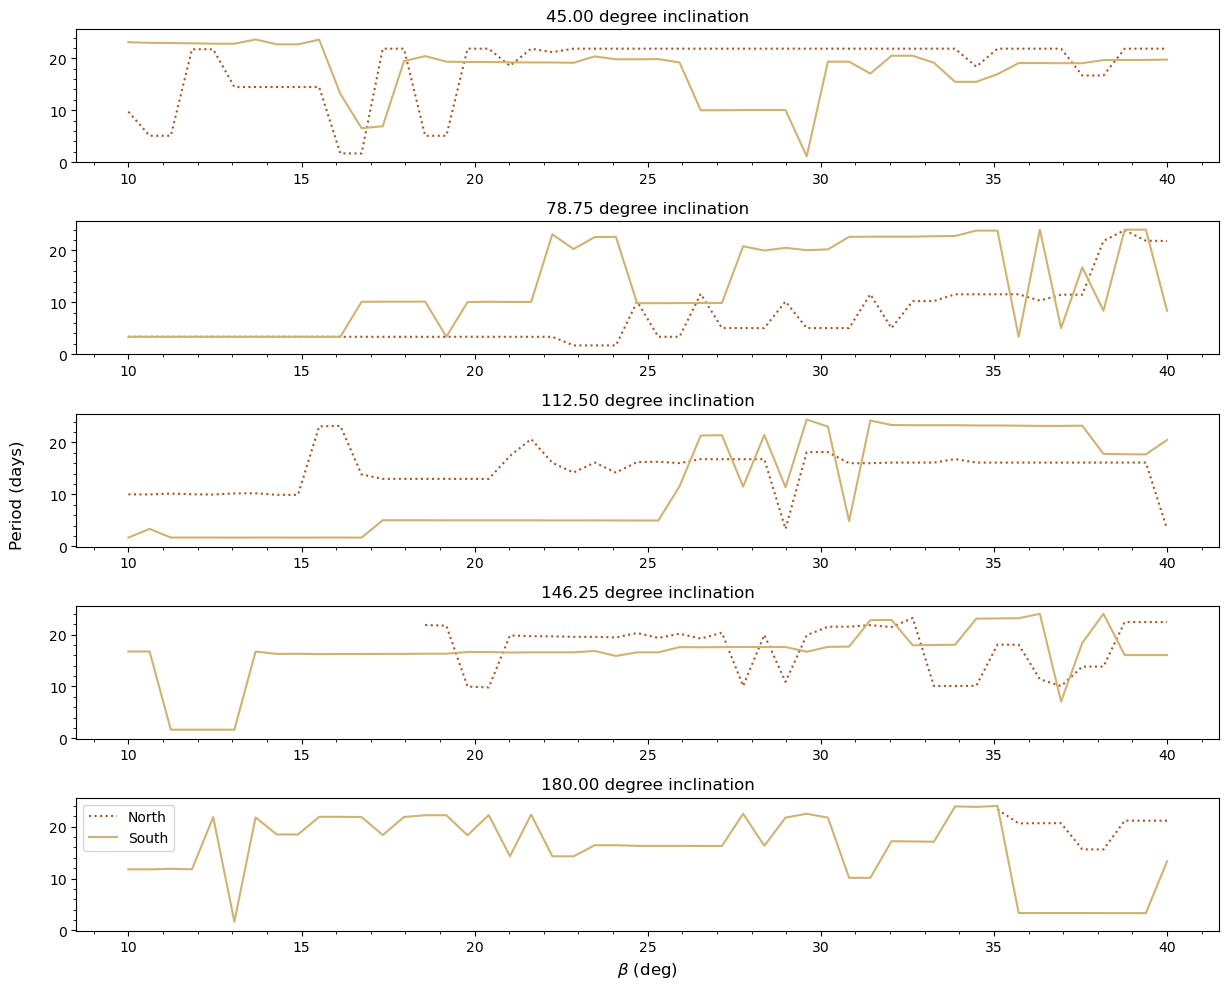

In [57]:
fig, axes = plt.subplots(5, 1, sharey=True, figsize=(12.0,10.0))

inc = ['45.00 degree inclination', '78.75 degree inclination', '112.50 degree inclination', '146.25 degree inclination', '180.00 degree inclination']
for j in range(5):
    ax = axes[j]
    axes[j].title.set_text(inc[j])
    ax.plot(betas,period_grid[:,j,0], ':', color = '#A9561E',label='North')
    ax.plot(betas,period_grid[:,j,1], color = '#D1B26F',label='South')
    
    plt.xlabel(r'$\beta$ (deg)', fontsize=12)
    ax.minorticks_on()
    
    #plt.ylabel('Period (d)')
    #ax.grid()
fig.tight_layout()
plt.legend(loc='upper left')
fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

plt.show()





In [ ]:
#plt.plot(times,north_visibility,label='N')
#plt.plot(times,south_visibility,label='S')
#plt.plot(times,south_visibility.astype('bool') + north_visibility.astype('bool'),label='S')

#plt.show()

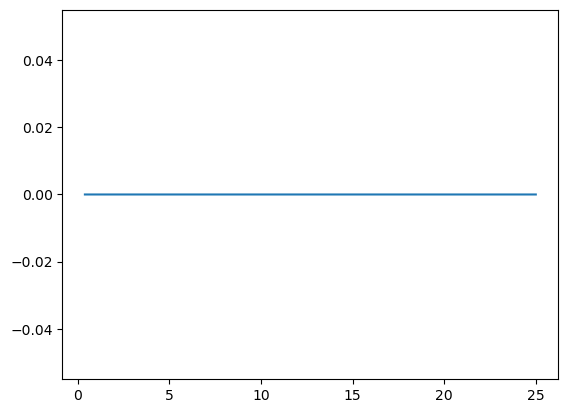

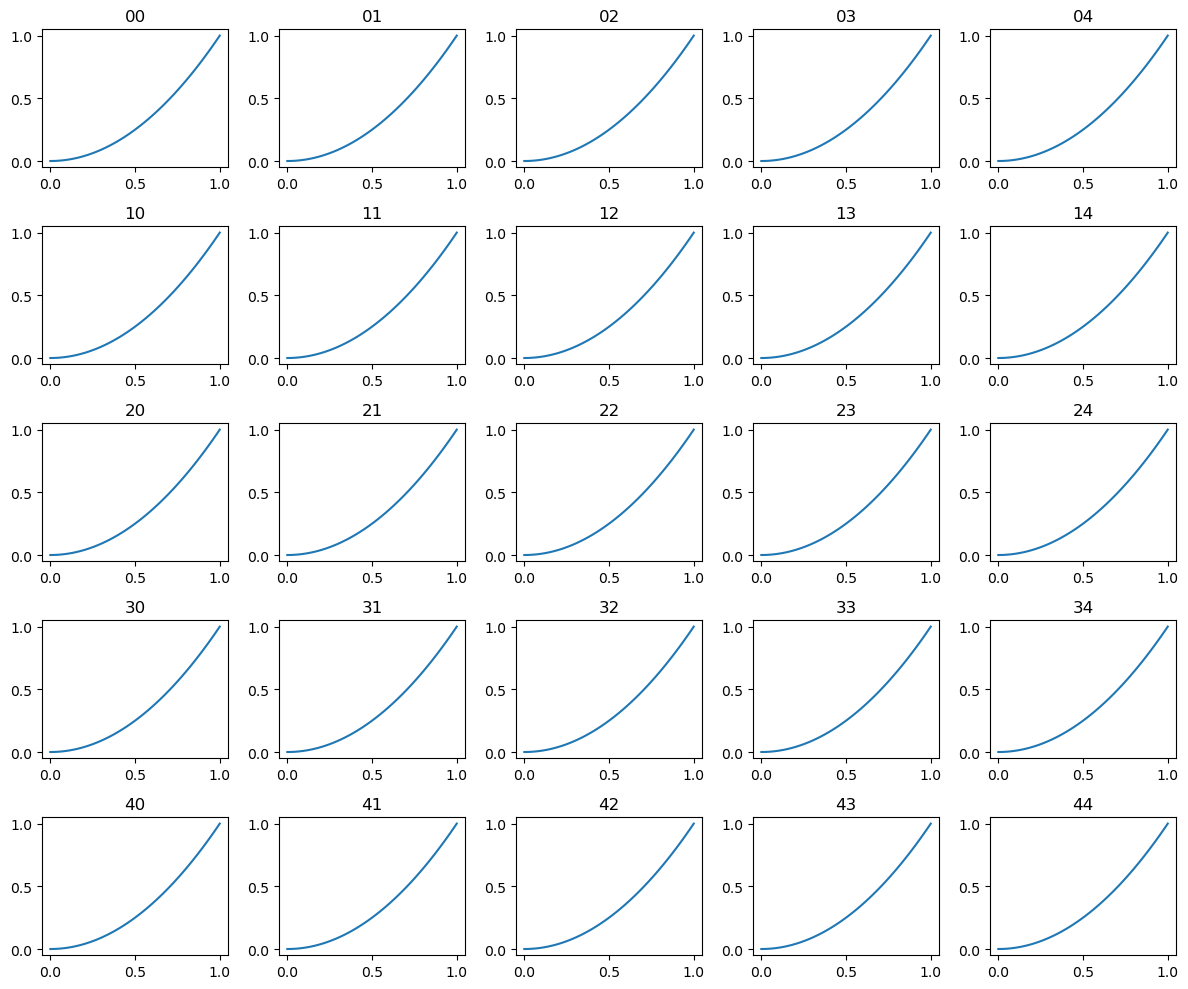

In [ ]:
fig, axes = plt.subplots(5,len(inclinations),figsize=(12.0,10.0))

for j in range(5):
    for k in range(len(inclinations)):

        ax = axes[j,k]
        x = np.linspace(0,1,100)
        ax.plot(x,x**2)
        ax.set_title(f'{j}{k}')
fig.tight_layout()
plt.show()


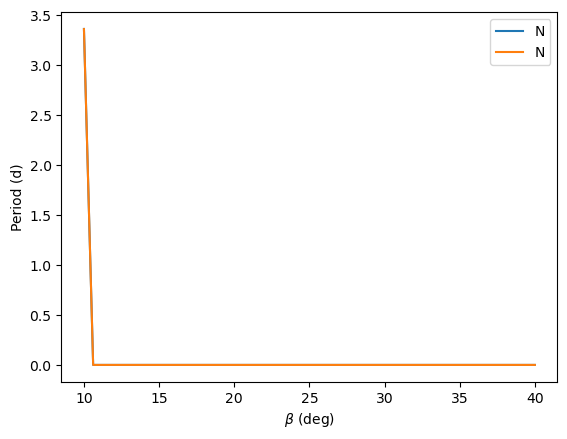

In [ ]:
plt.plot(betas,period_grid[:,1,0],label='N')
plt.plot(betas,period_grid[:,1,1],label='N')
plt.legend()

plt.xlabel(r'$\beta$ (deg)')
plt.ylabel('Period (d)')
plt.show()

In [ ]:
plt.plot(true_npg.period,true_npg.power)
plt.axvline(best_period_N.value,color='k')
plt.show()

AttributeError: 'float' object has no attribute 'value'

In [ ]:

fig, axs = plt.subplots(2)
axs[0].plot(north_periodogram.period.value, north_periodogram.power, 'k')
axs[0].set_title('North')
axs[1].plot(south_periodogram.period.value, south_periodogram.power, 'k')
axs[1].set_title('South')
for j in range(5):
    axs[0].axvline(best_period_N.value*(j+1), linestyle='--',color='k')
    axs[1].axvline(best_period_S.value*(j+1), linestyle='--',color='k')

for ax in axs.flat:
    ax.set(xlabel='Period (days)', ylabel='Power (W)')
fig.tight_layout()
plt.show

In [ ]:

times = np.linspace(0, 50, 1000)
durations = np.linspace(0.1, 2, 20)

M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, P_p, phi_p0, f, alpha, dalpha = 0.5, 0.75, 4.86, 90, 430, 20, 0.2, 18.5, 89.18, 0, 8.4630351, 0.6, 10, 75, 5 

for dur in durations:
   true_npg, true_spg = periods(dur, M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)
   print(dur)
